In [102]:
# import important packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from matplotlib import rcParams
import warnings

warnings.filterwarnings("ignore")

# figure size in inches
rcParams["figure.figsize"] = 10, 6
np.random.seed(42)

## 1. Load Dataset
- Load the `prime_indians_diabetes` dataset
- Check the first five samples. Are there any categorical features?
- Is this a classification or regression problem?
- Check the columns of the dataset

 There are  8 input variables and 1 output variable. Missing values are believed to be encoded with zero values. The variable names are as follows:

- Number of times pregnant.
- Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
- Diastolic blood pressure (mm Hg).
- Triceps skinfold thickness (mm).
- 2-Hour serum insulin (mu U/ml).
- Body mass index (weight in kg/(height in m)^2).
- Diabetes pedigree function.
- Age (years).
- Class variable (0 or 1).

In [103]:
df = pd.read_csv('pima_indians_diabetes.csv')
df.shape

(768, 9)

In [104]:
df.head(5)

,time_pregnant_no,plasma_concentration,diastolic_blood_pressure,triceps_skinfold_thickness,serum_insulin,bmi,diabetes_pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [105]:
df.columns

Index(['time_pregnant_no', 'plasma_concentration', 'diastolic_blood_pressure',
       'triceps_skinfold_thickness', 'serum_insulin', 'bmi',
       'diabetes_pedigree', 'age', 'class'],
      dtype='object')

## 2. Data Preprocessing and Model
- Assign features to `X` and target variable to `y`
- Create a pipeline for preprocessing which includes imputing and standardscaling
- Create a pipeline for preprocessor and the random forest classifier. Set `n_estimators=100`
- Train the model and make your predictions on the test dataset
- List the feature importance and the corresponding features
- Create a bar plot for the feature importances
- Drop the least important feature from the data and repeat the steps above

In [106]:
X = df.drop('class', axis=1)
y = df['class']

In [107]:
preprocessor = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [108]:
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

### Restating Instructions above:
- Train the model and make your predictions on the test dataset
- List the feature importance and the corresponding features
- Create a bar plot for the feature importances
- Drop the least important feature from the data and repeat the steps above

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,random_state=42)

In [110]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('imputer', SimpleImputer()),
                                 ('scaler', StandardScaler())])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [111]:
y_predict = model.predict(X_test)
accuracy_score(y_test, y_predict)

0.75

In [112]:
feature_importance = model.named_steps['classifier'].feature_importances_
features = X.columns
print(feature_importance)
print()
print(features)

[0.09080194 0.27903048 0.08473135 0.06654812 0.07151517 0.15933734
 0.12334499 0.12469061]

Index(['time_pregnant_no', 'plasma_concentration', 'diastolic_blood_pressure',
       'triceps_skinfold_thickness', 'serum_insulin', 'bmi',
       'diabetes_pedigree', 'age'],
      dtype='object')


### Restating Instructions above:
- Create a bar plot for the feature importances

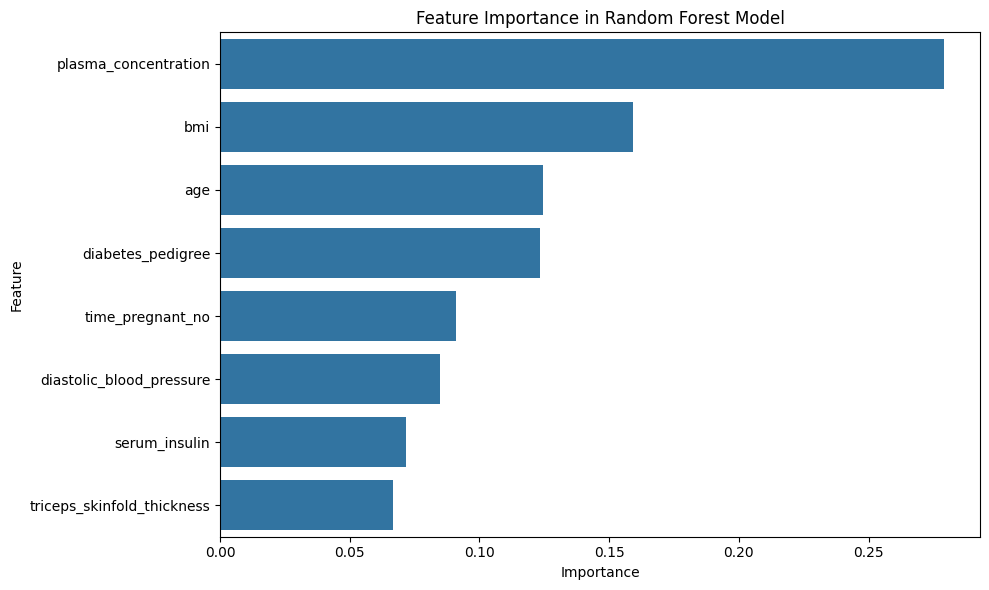


Feature Importances:
                      Feature  Importance
1        plasma_concentration    0.279030
5                         bmi    0.159337
7                         age    0.124691
6           diabetes_pedigree    0.123345
0            time_pregnant_no    0.090802
2    diastolic_blood_pressure    0.084731
4               serum_insulin    0.071515
3  triceps_skinfold_thickness    0.066548


In [113]:
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance in Random Forest Model')
plt.tight_layout()
plt.show()

print("\nFeature Importances:")
print(importance_df)

# Drop the least important feature from the data and repeat the steps above

In [ ]:
# drop
X = df.drop(['class','triceps_skinfold_thickness'], axis=1)

preprocessor = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,random_state=42)

In [115]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('imputer', SimpleImputer()),
                                 ('scaler', StandardScaler())])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [116]:
y_predict = model.predict(X_test)
accuracy_score(y_test, y_predict)

0.75

[0.09293181 0.2818832  0.09515745 0.08270047 0.18065798 0.12620757
 0.14046151]

Index(['time_pregnant_no', 'plasma_concentration', 'diastolic_blood_pressure',
       'serum_insulin', 'bmi', 'diabetes_pedigree', 'age'],
      dtype='object')


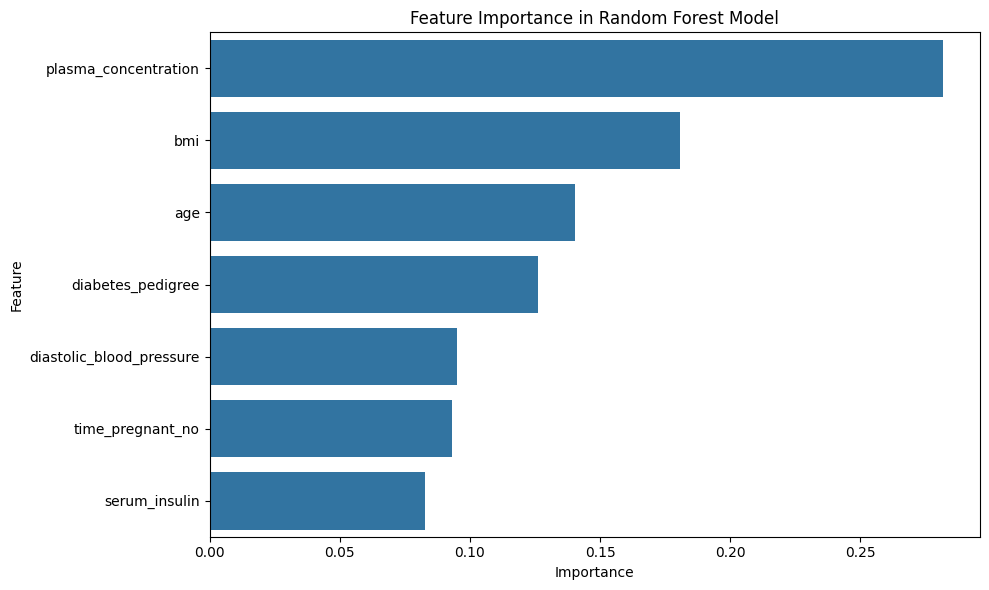


Feature Importances:
                    Feature  Importance
1      plasma_concentration    0.281883
4                       bmi    0.180658
6                       age    0.140462
5         diabetes_pedigree    0.126208
2  diastolic_blood_pressure    0.095157
0          time_pregnant_no    0.092932
3             serum_insulin    0.082700


In [117]:
feature_importance = model.named_steps['classifier'].feature_importances_
features = X.columns
print(feature_importance)
print()
print(features)

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance in Random Forest Model')
plt.tight_layout()
plt.show()

print("\nFeature Importances:")
print(importance_df)